In [1]:
import pandas as pd
import sweetviz as sv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import MeanShift, estimate_bandwidth

c:\Users\panya\anaconda3\envs\eda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_clean_cat = pd.read_csv('./csv/clean_order_v2.csv')
df_cluster = df_clean_cat.select_dtypes(include=['uint', 'int'])
df_clean_cat.head()

,customer_id,order_product_id,browser,platform,customer_firstname,customer_lastname,customer_email,customer_gender,Majority_code,order_price_paid,...,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18
0,0,121,2,0,Julie,Staplea,juliestaples40@gmail.com,2,77,0,...,0,0,0,0,0,0,0,0,0,0
1,0,121,2,0,Julie,Staples,juliestaples40@gmail.com,2,77,4500,...,0,0,0,0,0,0,0,0,0,0
2,0,121,2,0,Alana,Locandro,alana.lannie@gmail.com,1,13,4500,...,0,0,0,0,0,0,0,0,0,0
3,0,121,7,6,Harriet,Peace,Harrietpeace@icloud.com,1,77,4500,...,0,0,0,0,0,0,0,0,0,0
4,221,121,8,0,Kain,Ingham,Kaino_01@hotmail.com,0,13,4500,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_cluster.iloc[:,4:]

,customer_gender,Majority_code,order_price_paid,order_state,order_payment_by,booked_days,departure_year,departure_month,departure_day,departure_DayofYear,...,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18
0,2,77,0,1,0,60,2018,10,29,302,...,0,0,0,0,0,0,0,0,0,0
1,2,77,4500,2,0,60,2018,10,29,302,...,0,0,0,0,0,0,0,0,0,0
2,1,13,4500,2,0,53,2018,10,30,303,...,0,0,0,0,0,0,0,0,0,0
3,1,77,4500,2,0,75,2018,11,23,327,...,0,0,0,0,0,0,0,0,0,0
4,0,13,4500,2,0,1,2018,9,15,258,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,0,218,0,1,0,0,2023,1,16,16,...,0,0,0,0,0,1,0,0,0,0
9246,0,218,7020,2,0,117,2023,5,13,133,...,0,0,0,0,0,1,0,0,0,0
9247,0,103,3980,2,0,0,2023,1,16,16,...,0,0,0,0,0,1,0,0,0,0
9248,2,233,4280,2,0,3,2023,1,21,21,...,0,0,0,0,0,1,0,0,0,0


In [9]:
pca = PCA(n_components=0.9)
sds = StandardScaler()
X_sds = sds.fit_transform(df_cluster.iloc[:,4:])
X_pca = pca.fit_transform(X_sds)
X_pca.shape

(9250, 21)

In [10]:
pca.explained_variance_ratio_

array([0.09033857, 0.07216477, 0.06738626, 0.06201454, 0.05739749,
       0.05422222, 0.04809653, 0.04561117, 0.04085997, 0.03614781,
       0.03314242, 0.0320487 , 0.03164325, 0.03140631, 0.03135114,
       0.03005159, 0.02966341, 0.02897874, 0.02856863, 0.02687156,
       0.02456575])

In [11]:
X_pca

array([[-1.91628107,  0.76305156, -0.71792731, ...,  1.44526851,
         0.87781452, -0.29920181],
       [-1.77225357,  1.5149419 , -0.42513297, ...,  1.71262586,
         0.87310665, -0.54611243],
       [-1.91132618,  1.69258839, -0.41894669, ...,  1.416182  ,
         1.28010071,  0.51434303],
       ...,
       [ 2.76225807, -0.59892512,  1.94472378, ..., -0.42290034,
        -0.03220769,  0.03994077],
       [ 0.66600702, -1.9498956 ,  0.81673391, ..., -0.68940754,
        -2.18115379, -1.93598013],
       [-0.61930286, -2.3189576 ,  0.75303534, ..., -0.11473675,
        -0.60810406, -0.61754229]])

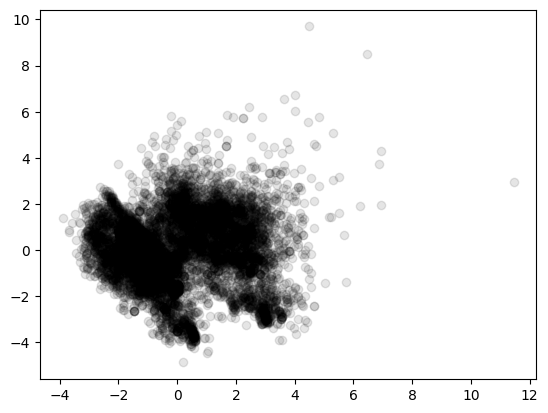

In [12]:
plt.scatter(X_pca.T[0], X_pca.T[1], alpha=0.1, color = "black")

In [13]:
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

In [14]:
#Fit the model:
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_pca)
MS_labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(MS_labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 16


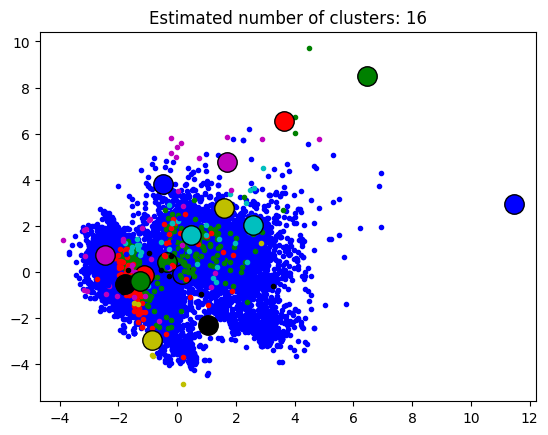

In [15]:
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = MS_labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_pca[my_members, 0], X_pca[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

[-1]


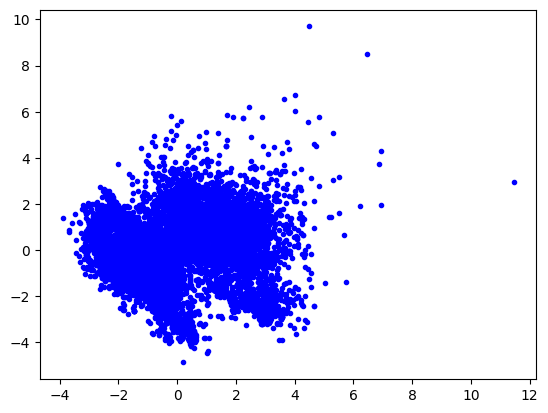

In [16]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=.3, min_samples=20)
dbscan_model.fit(X_pca)
dbscan_result = dbscan_model.labels_
print(np.unique(dbscan_result))
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(np.unique(dbscan_result), colors):
    my_members = dbscan_result == k
    plt.plot(X_pca[my_members, 0], X_pca[my_members, 1], col + ".")
# plt.title("Estimated number of clusters: %d" % np.unique(dbscan_result))
plt.show()

c:\Users\panya\anaconda3\envs\eda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


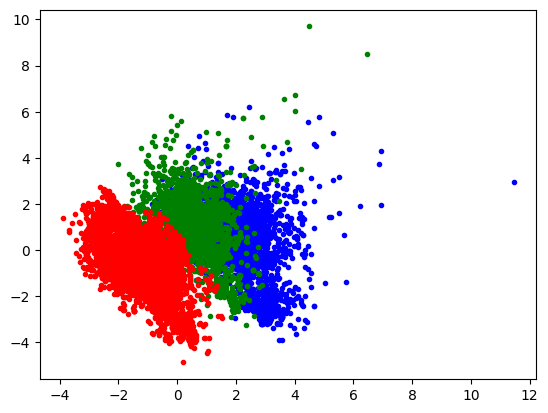

In [17]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3,random_state=1)
clustering.fit(X_pca)

plt.figure(1)
plt.clf()
MS_labels = clustering.labels_
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(4), colors):
    my_members = MS_labels == k
    plt.plot(X_pca[my_members, 0], X_pca[my_members, 1], col + ".")
# plt.title("Estimated number of clusters: %d" % np.unique(dbscan_result))
plt.show()